**GLOBAL COUNTRY DATASET EDA (Exploratory Data Analysis)**


Diharapkan EDA kami dapat membantu dalam mengidentifikasi tren, pola, anomali, dan relasi antar variabel yang terdapat dataset dan juga memberikan wawasan lebih mengenai data terkait untuk membimbing pengambilan keputusan analisis selanjutnya.


In [57]:
from IPython import display

color_map = ['#FFFFFF', '#FF5733']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, 
                                            main_color,  main_color, prompt, main_color, main_color, 
                                            main_color, main_color))

def nb(): 
    return display.HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()


<font size="+3" color="#fccf03"><b>1 <span style='color:#4285f4; font-weight:bold'>|</span> Importing Python Libraries </b></font><br><a id="1"></a>
- **For Data Processing**: sqlite3, numpy, pandas
- **For Data Visualization**: matplotlib, seaborn, plotly

In [58]:
import numpy as np
import pandas as pd
import sqlite3
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Menyembunyikan Peringatan
import warnings
warnings.filterwarnings("ignore")

<font size="+3" color="#fccf03"><b>2 <span style='color:#4285f4; font-weight:bold'>|</span> Membaca Dataset </b></font><br><a id="1"></a>

In [59]:
df= pd.read_csv("world-data-2023.csv")
df

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0    Afghanistan               60           AF                58.10%   
1        Albania              105           AL                43.10%   
2        Algeria               18           DZ                17.40%   
3        Andorra              164           AD                40.00%   
4         Angola               26           AO                47.50%   
..           ...              ...          ...                   ...   
190    Venezuela               32           VE                24.50%   
191      Vietnam              314           VN                39.30%   
192        Yemen               56           YE                44.60%   
193       Zambia               25           ZM                32.10%   
194     Zimbabwe               38           ZW                41.90%   

    Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0          652,230           323,000       32.49          93.0   
1           28,748             9,000       11.78         355.0   
2        2,381,741           317,000       24.28         213.0   
3              468               NaN        7.20         376.0   
4        1,246,700           117,000       40.73         244.0   
..             ...               ...         ...           ...   
190        912,050           343,000       17.88          58.0   
191        331,210           522,000       16.75          84.0   
192        527,968            40,000       30.45         967.0   
193        752,618            16,000       36.19         260.0   
194        390,757            51,000       30.68         263.0   

    Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0                Kabul         8,672  ...                           78.40%   
1               Tirana         4,536  ...                           56.90%   
2              Algiers       150,006  ...                           28.10%   
3     Andorra la Vella           469  ...                           36.40%   
4               Luanda        34,693  ...                           33.40%   
..                 ...           ...  ...                              ...   
190            Caracas       164,175  ...                           45.80%   
191              Hanoi       192,668  ...                           43.50%   
192              Sanaa        10,609  ...                           81.00%   
193             Lusaka         5,141  ...                           27.50%   
194             Harare        10,983  ...                           25.80%   

    Physicians per thousand  Population  \
0                      0.28  38,041,754   
1                      1.20   2,854,191   
2                      1.72  43,053,054   
3                      3.33      77,142   
4                      0.21  31,825,295   
..                      ...         ...   
190                    1.92  28,515,829   
191                    0.82  96,462,106   
192                    0.31  29,161,922   
193                    1.19  17,861,030   
194                    0.21  14,645,468   

     Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
0                                       48.90%           9.30%         71.40%   
1                                       55.70%          18.60%         36.60%   
2                                       41.20%          37.20%         66.10%   
3                                          NaN             NaN            NaN   
4                                       77.50%           9.20%         49.10%   
..                                         ...             ...            ...   
190                                     59.70%             NaN         73.30%   
191                                     77.40%          19.10%         37.60%   
192                                     38.00%             NaN         26.60%   
193                                     74.60%          16.20%         15.60%   
194   

In [60]:
# Import display module
from IPython import display

# Daftar negara yang ingin ditampilkan
countries = ['Indonesia', 'United States', 'Saudi Arabia', 'Palestinian National Authority', 'Germany', 'Malaysia']

# Filter DataFrame berdasarkan negara
df_countries = df[df['Country'].isin(countries)]

# Tampilkan data
display.display(df_countries.head(10).T)
print(f'shape: {df_countries.shape[0]} rows by {df_countries.shape[1]} columns')


64   \
Country                                                Germany   
Density\n(P/Km2)                                           240   
Abbreviation                                                DE   
Agricultural Land( %)                                   47.70%   
Land Area(Km2)                                         357,022   
Armed Forces size                                      180,000   
Birth Rate                                                 9.5   
Calling Code                                              49.0   
Capital/Major City                                      Berlin   
Co2-Emissions                                          727,973   
CPI                                                     112.85   
CPI Change (%)                                           1.40%   
Currency-Code                                              EUR   
Fertility Rate                                            1.56   
Forested Area (%)                                       32.70%   
Gasoline Price                                          $1.39    
GDP                                        $3,845,630,030,824    
Gross primary education enrollment (%)                 104.00%   
Gross tertiary education enrollment (%)                 70.20%   
Infant mortality                                           3.1   
Largest city                                            Berlin   
Life expectancy                                           80.9   
Maternal mortality ratio                                   7.0   
Minimum wage                                            $9.99    
Official language                                       German   
Out of pocket health expenditure                        12.50%   
Physicians per thousand                                   4.25   
Population                                          83,132,799   
Population: Labor force participation (%)               60.80%   
Tax revenue (%)                                         11.50%   
Total tax rate                                          48.80%   
Unemployment rate                                        3.04%   
Urban_population                                    64,324,835   
Latitude                                             51.165691   
Longitude                                            10.451526   

                                                           78   \
Country                                              Indonesia   
Density\n(P/Km2)                                           151   
Abbreviation                                                ID   
Agricultural Land( %)                                   31.50%   
Land Area(Km2)                                       1,904,569   
Armed Forces size                                      676,000   
Birth Rate                                               18.07   
Calling Code                                              62.0   
Capital/Major City                                     Jakarta   
Co2-Emissions                                          563,325   
CPI                                                     151.18   
CPI Change (%)                                           3.00%   
Currency-Code                                              IDR   
Fertility Rate                                            2.31   
Forested Area (%)                                       49.90%   
Gasoline Price                                          $0.63    
GDP                                        $1,119,190,780,753    
Gross primary education enrollment (%)                 106.40%   
Gross tertiary education enrollment (%)                 36.30%   
Infant mortality                                          21.1   
Largest city                                        Kalimantan   
Life expectancy                                           71.5   
Maternal mortality ratio                                 177.0   
Minimum wage                                            $0.48    
Official language               

shape: 6 rows by 35 columns


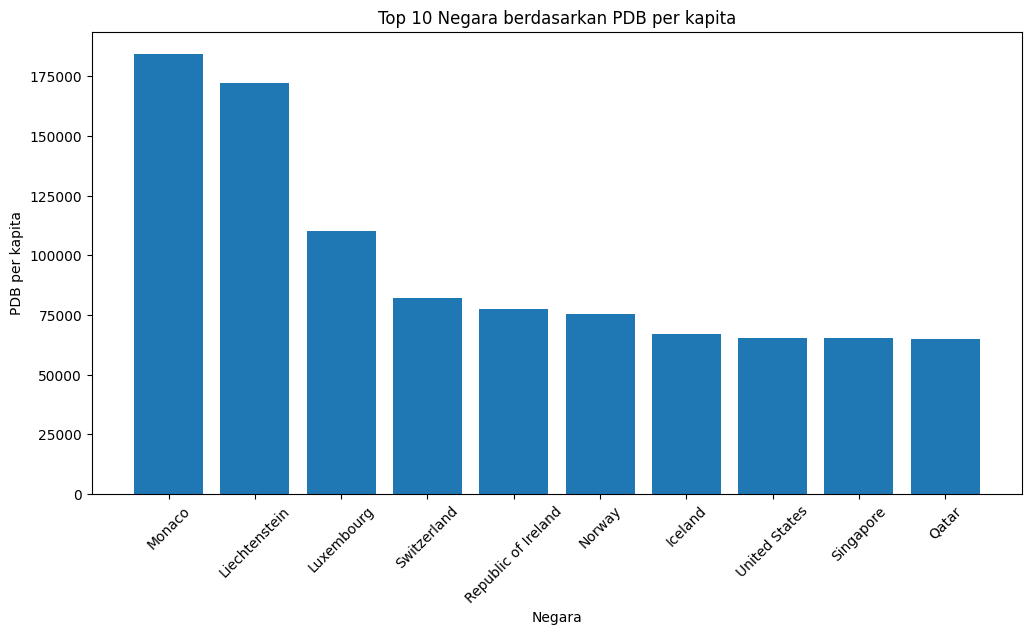

In [61]:
# Convert seluruh kolom ke tipe string
df['GDP'] = df['GDP'].astype(str).str.replace('$', '').str.replace(',', '')
df['Population'] = df['Population'].astype(str).str.replace(',', '')

# NConvert kembali ke tipe float untuk dibagi
df['GDP'] = df['GDP'].astype(float)
df['Population'] = df['Population'].astype(float)

df['GDP_per_Capita'] = df['GDP'] / df['Population']
df_top10 = df.sort_values('GDP_per_Capita', ascending=False).head(10)

plt.figure(figsize=(12,6))  
plt.bar(df_top10['Country'], df_top10['GDP_per_Capita'])  
plt.xlabel('Negara')  
plt.ylabel('PDB per kapita')  
plt.title('Top 10 Negara berdasarkan PDB per kapita')  
plt.xticks(rotation=45)  
plt.show()

*PDB (Produk Domestik Bruto) per kapita*

PDB per kapita merupakan hasil penghitungan PDB dan membaginya dengan jumlah penduduk suatu negara. Indikator ini memberikan informasi mengenai seberapa besar kontribusi ekonomi yang diberikan setiap individu  dalam suatu negara. PDB per kapita dapat digunakan untuk mengukur  kemakmuran suatu negara. Semakin tinggi PDB per kapita suatu negara, maka semakin besar pula kesejahteraan masyarakatnya.

<font size="+2" color="#fccf03"><b style="font-weight:normal">2.1 <span style='color:#4285f4; font-weight:normal'>|</span> Statistik Dataset </b></font><br><a id="1"></a>

In [62]:
df.describe()[1:].T.style.background_gradient(cmap='Blues', axis=1)

<font size="+2" color="#fccf03"><b style="font-weight:normal">2.2 <span style='color:#4285f4; font-weight:normal'>|</span> Matriks Korelasi </b></font><br><a id="1"></a>

In [63]:
# Ubah semua koma, simbol persen, simbol dolar, dan spasi menjadi string kosong
df = df.replace(',|%|\$| ','', regex=True)

numeric_columns = [
    'Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 
    'Calling Code', 'Co2-Emissions', 'CPI', 'CPI Change (%)', 'Fertility Rate', 'Forested Area (%)', 
    'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)', 
    'Gross tertiary education enrollment (%)', 'Infant mortality', 'Life expectancy', 
    'Maternal mortality ratio', 'Minimum wage', 'Out of pocket health expenditure', 
    'Physicians per thousand', 'Population', 'Population: Labor force participation (%)', 
    'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population', 
    'Latitude', 'Longitude', 'GDP_per_Capita'
]

# Ubah kolom numerik menjadi float
for col in numeric_columns:
    df[col] = df[col].astype(float)

fig = px.imshow(df[numeric_columns].corr(), color_continuous_scale="Blues")
fig.update_layout(height=1000)
fig.show()


Matriks Korelasi sangat penting untuk menemukan keterkaitan yang erat antara variabel satu dengan variabel yang lain. Matriks korelasi biasa ditampilkan dalam format tabel dapat lebih mudah untuk dibaca dan dipahami sehingga dapat membuat para *stakeholder* untuk memprediksi apa yang akan terjadi di masa depan. Karena semakin banyak dan rinci data yang disajikan maka keputusan penting yang dibuat akan lebih mudah.

<font size="+3" color="#fccf03"><b>3 <span style='color:#4285f4; font-weight:bold'>|</span> Exploratory Analysis / EDA </b></font><br><a id="1"></a>

In [64]:
fig = px.scatter(df, x="Physicians per thousand", y="Birth Rate", color="GDP_per_Capita", hover_data=df[['Country']])
fig.update_layout(
    title='Plot Sebaran Angka Kelahiran & Dokter per Seribu Populasi'
)


trendline = px.scatter(df, x="Physicians per thousand", y="Birth Rate",
                       trendline="ols", trendline_options=dict(log_x=True))
trendline.data[1]['line']['color'] = '#5591f5'
fig.add_trace(trendline.data[1])

fig.update_layout(
    template='gridon',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    title={
        'text': 'Plot Sebaran Angka Kelahiran & Dokter per Seribu Populasi',
        'font': {'color': 'green'}
    },
)

fig.update_xaxes(title_text="Dokter per Seribu Populasi")
fig.update_yaxes(title_text="Angka Kelahiran")

fig.show()


**Angka Kelahiran:**  Angka yang menunjukkan jumlah bayi yang hidup di setiap seribu penduduk per tahunnya.  

Dari grafik yang ditunjukkan sangat tampak hubungan yang kuat mengenai Angka kelahiran dan juga dokter per seribu populasi dengan indikasi $R^2=0.747024$.

Dari grafik terlihat bahwa semakin rendah jumlah dokternya maka akan semakin tinggi pula tingkat kelahirannya

In [65]:
fig = make_subplots(rows=1, cols=2)

scatter1 = px.scatter(df, x='Physicians per thousand', y='Infant mortality',
                      trendline="ols", trendline_options=dict(log_x=True), hover_data=df[['Country']])
fig.add_trace(go.Scatter(scatter1.data[0], marker_color='#ea4335'), row=1, col=1)
fig.add_trace(go.Scatter(scatter1.data[1], line=dict(color='#5591f5')), row=1, col=1)

fig.update_xaxes(title_text="Dokter per Seribu Populasi", row=1, col=1)
fig.update_yaxes(title_text="Mortalitas bayi", row=1, col=1)

scatter2 = px.scatter(df, x="Physicians per thousand", y="Maternal mortality ratio",
                      trendline="ols", trendline_options=dict(log_x=True), hover_data=df[['Country']])
fig.add_trace(go.Scatter(scatter2.data[0], marker_color='#34a853'), row=1, col=2)
fig.add_trace(go.Scatter(scatter2.data[1], line=dict(color='#5591f5')), row=1, col=2)

fig.update_xaxes(title_text="Dokter per Seribu", row=1, col=2)
fig.update_yaxes(title_text="Rasio Kematian Ibu", row=1, col=2)

fig.update_layout(
    showlegend=False,
    template='plotly_white',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()


**Mortalitas Bayi:** Mortalitas bayi adalah tingkat kematian untuk setiap 1000 kelahiran.  
**Rasio Kematian Ibu:** Rasio kematian ibu didefinisikan sebagai jumlah kematian ibu dalam jangka waktu tertentu per 100.000 kelahiran hidup dalam jangka waktu yang sama.

It's connecting... Seiring penurunan jumlah dokter per seribu orang, tingkat kematian bayi dan kematian ibu naik secara drastis. Pada grafik hubungannya sangat kuat, dengan R2 mencapai 0.677729. 
Grafik ini menunjukkan pentingnya dokter dalam proses kelahiran. Tanpa kehadiran mereka, jumlah kematian bayi dan ibu akan meningkat. Namun, mengapa negara dengan dokter yang relatif sedikit (dibandingkan dengan jumlah penduduknya) memiliki tingkat kelahiran yang lebih tinggi? Let's find out!

In [66]:
fig = make_subplots(rows=1, cols=2)

scatter1 = px.scatter(df, x="Physicians per thousand", y="GDP_per_Capita",
                      trendline="ols", trendline_options=dict(log_x=False), hover_data=df[['Country']])
fig.add_trace(go.Scatter(scatter1.data[0], marker_color='#5591f5'), row=1, col=1)
fig.add_trace(go.Scatter(scatter1.data[1], line=dict(color='#ea4335')), row=1, col=1)

fig.update_xaxes(title_text="Dokter per Seribu Populasi", row=1, col=1)
fig.update_yaxes(title_text="GDPDB per Kapita", row=1, col=1)

scatter2 = px.scatter(df, x="Birth Rate", y="GDP_per_Capita",
                      trendline="ols", trendline_options=dict(log_x=True), hover_data=df[['Country']])
fig.add_trace(go.Scatter(scatter2.data[0], marker_color='#34a853'), row=1, col=2)
fig.add_trace(go.Scatter(scatter2.data[1], line=dict(color='#ea4335')), row=1, col=2)

fig.update_xaxes(title_text="Tingkat Kelahiran", row=1, col=2)
fig.update_yaxes(title_text="PDB per Kapita", row=1, col=2)

fig.update_layout(
    showlegend=False,
    template='plotly_white',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()


Bagai berbagai puzzle yang telah ditemukan disusun, mulai terlihat pola dimana pada negara yang miskin :
- Jumlah dokter per seribu orang rendah.
- Tingkat kelahiran tinggi.
- Tingkat mortalitas bayi dan rasio kematian ibu tinggi.

Ini berarti pada negara-negara miskin, angka kelahiran tinggi karena anak-anak dibutuhkan untuk bekerja dan memberikan penghasilan bagi keluarga. Anak-anak diharuskan menjaga orang tua yang lanjut usia karena kurangnya dana pensiun.
Inilah sebabnya, di negara-negara miskin, meskipun jumlah dokternya sedikit, namun angka kelahirannya tinggi, sehingga menyebabkan tingginya angka kematian bayi dan tingginya angka kematian ibu.

In [67]:
fig = px.scatter(df, x="GDP_per_Capita", y="Life expectancy",
                 trendline="ols", trendline_options=dict(log_x=True), hover_data=df[['Country']])
fig.update_layout(
    title='Sebaran plot Ekspektasi Hidup dan PDB per Kapita'
)

trendline = px.scatter(df, x="GDP_per_Capita", y="Life expectancy",
                       trendline="ols", trendline_options=dict(log_x=True))
trendline.data[1]['line']['color'] = '#ea4335'
fig.add_trace(trendline.data[1])

fig.update_xaxes(title_text="PDB per Kapita")
fig.update_yaxes(title_text="Ekspektasi Hidup")

fig.update_layout(
    template='gridon',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

Ekspektasi hidup dan PDB per kapita memiliki korelasi yang kuat.   
Dengan kata lain, negara yang miskin memiliki ekspektasi hidup yang lebih rendah daripada negara yang kaya

Terlihat erdapat korelasi negatif antara harapan hidup dan tingkat kelahiran. Hal ini disebabkan oleh fakta bahwa negara-negara dengan tingkat kelahiran yang tinggi biasanya memiliki GDP per Kapita yang rendah. Akibatnya, penduduk di negara-negara tersebut tidak mampu membiayai kebutuhan pokok untuk menjalani gaya hidup yang sehat, seperti akses ke layanan kesehatan dan lingkungan yang bersih. Dengan demikian, harapan hidup di negara-negara tersebut cenderung rendah. Dua negara dengan harapan hidup terendah adalah Central African Republic dan Lesotho dimana mereka memiliki rata-rata usia hidup hanya di kisaran 52,8 dan 53,7 tahun!

In [68]:
data = df[['Country', 'Population']].sort_values('Population', ascending=False)[:10]
colors = ['#a1c2fa', '#f28e86', '#fde396', '#aedcba', '#a1c2fa', '#f28e86', '#fcd050', '#5db975', '#5591f5', '#ea4335']
fig = go.Figure(go.Bar(
            x=data['Population'][::-1],
            y=data['Country'][::-1],
            marker=dict(color=colors),
            text=data['Population'].apply(lambda x:str(int(x/1000000))+"M")[::-1], 
            textposition='outside',
            orientation='h'))
fig.update_layout(
    title='Top 10 Negara dengan Populasi terbanyak',
    xaxis_title="Populasi",
    template='gridon',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

df_sorted = df.sort_values('Population', ascending=False)

top_n = 2
top_countries = df_sorted.head(top_n)

other_population = df_sorted.iloc[top_n:]['Population'].sum()

new_df = pd.concat([top_countries, pd.DataFrame({'Country': ['Others'], 'Population': [other_population]})])

colors = ['#4285f4', '#ea4335', '#34a853']
fig = go.Figure(data=[go.Pie(labels=new_df['Country'],
                             values=new_df['Population'],
                             textinfo="label+percent",
                             pull=[0, 0, 0],
                             showlegend=False,
                             marker_colors=colors,
                            )])


fig.update_traces(
    hole=0.6
)
fig.update_layout(
    title='Distribusi populasi pada Negara',
    template='gridon',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    annotations=[
        dict(
            text="Hampir setengah <br>Penduduk bumi adalah <br> rakyat China dan India!", 
            x=0.5, y=0.5, 
            font_size=13,
            showarrow=False
        )
    ]
)

fig.show()

In [69]:
df['population_growth_indicator'] = df["Fertility Rate"] - 2.1
df['population_growth_indicator'] = df['population_growth_indicator'].apply(lambda x:float('{:.3g}'.format(x)))

# Buat grafik batang
fig = px.bar(df, x='population_growth_indicator', y='Country', text='population_growth_indicator', orientation='h')

# Set pewarnaan batang dengan nilai positif dan negatif
fig.update_traces(marker_color=['#ea4335' if val < 0 else '#4285f4' for val in df['population_growth_indicator']],
                  textposition='outside')

# Uniform Text
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=2600,
    title="Indikator Pertumbuhan Populasi Negara",
    template='gridon',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    margin=dict(l=220)  # Menyesuaikan margin untuk memberikan space lebih
)


fig.show()

Kita dapat menggunakan grafik ini untuk memprediksi negara mana yang akan mengalami pertumbuhan penduduk dalam beberapa dekade mendatang, jika tingkat kesuburannya kurang lebih relatif sama.

Namun kita tidak dapat menggunakan grafik ini untuk memprediksi negara mana yang akan menghadapi <b><mark>krisis kelebihan populasi</mark></b> atau <b><mark>krisis kekurangan populasi</mark></b> karena ada faktor lain yang perlu dipertimbangkan. Misalnya, suatu negara mungkin memiliki tingkat kesuburan yang tinggi, namun hal ini tidak berarti negara tersebut akan mengalami krisis kelebihan populasi karena negara tersebut mungkin mempunyai banyak orang lanjut usia yang akan segera meninggal atau negara tersebut mungkin mempunyai lahan yang luas untuk ditinggali. sejumlah besar orang. Dan ini hanyalah salah satu contoh dimana luas lahan atau sebaran umur penduduk menjadi faktor yang perlu dipertimbangkan. Ada lebih banyak faktor yang perlu dipertimbangkan ketika membuat prediksi semacam itu.

In [70]:
import plotly.express as px

# Ubah kolom 'Armed Forces size' menjadi tipe data numerik
df['Kekuatan Militer'] = df['Armed Forces size'].apply(lambda x: str(x).replace(',', '') if pd.notnull(x) else np.nan).astype(float)

# Urutkan DataFrame berdasarkan 'Kekuatan Militer' dan ambil 10 baris teratas
top10 = df.sort_values('Kekuatan Militer', ascending=False).head(10)

# Buat grafik batang
fig = px.bar(top10, x='Country', y='Kekuatan Militer', title='Top 10 Negara dengan Kekuatan Militer Terbesar',
             color='Kekuatan Militer', color_continuous_scale='Blues')

# Tambahkan label pada sumbu
fig.update_xaxes(title_text='Negara')
fig.update_yaxes(title_text='Kekuatan Militer')

# Atur layout
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor="LightSteelBlue",
)

# Tampilkan grafik
fig.show()


**Kekuatan Militer**

Data diatas menunjukkan kekuatan militer terbesar di Bumi. Namun grafik diatas menunjukkan kekuatan berdasarkan jumlah personil militer dan bukan kekuatan yang sebenarnya. Ada banyak faktor seperti riset militer yang juga berkaitan dengan bidang pendidikan suatu negara seperti misil, kekuatan siber, dan nuklir sebagai senjata pemusnah massal. Kekuatan militer ini cukup penting untuk disinggung dikarenakan situasi geopolitik dunia yang saat ini sedang tidak stabil dan dapat terjun ke situasi yang sangat buruk disaat yang cepat.

***PENUTUPAN***

Cukup sekian penjelasan dari dataset yang kami miliki, kami masih belum membahas lengkap isi dari dataset ini seperti :

- Harga minyak
- Pendapatan pajak
- Emisi CO2

Thanks for listening and reading this with us. Thank you, minna-san!